#### `import Library`

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import missingno

####
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

###sklearn -- metrics
from sklearn.metrics import mean_squared_error

# skleran ---model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## `Read the dataset`

In [2]:
TRAIN_DATA_PATH = os.path.join(os.getcwd(),"Data.csv")
df = pd.read_csv(TRAIN_DATA_PATH)
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [3]:
###remove the Brackets to club
df["Club"] = df["Club"].str.strip("()")

In [4]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [5]:
df["Goals"].sort_values(ascending=True)

375     2
362     2
359     2
377     2
352     2
       ..
408    34
391    36
195    36
317    36
12     37
Name: Goals, Length: 660, dtype: int64

In [6]:
###check nulls
df.isnull().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

### `EDA`

In [7]:
###drop the colum legua 
df.drop(columns=["League"], axis=0, inplace=True)

In [8]:
df=df.dropna()

In [9]:
###check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 0 to 659
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  626 non-null    object 
 1   Club                     626 non-null    object 
 2   Player Names             626 non-null    object 
 3   Matches_Played           626 non-null    int64  
 4   Substitution             626 non-null    int64  
 5   Mins                     626 non-null    int64  
 6   Goals                    626 non-null    int64  
 7   xG                       626 non-null    float64
 8   xG Per Avg Match         626 non-null    float64
 9   Shots                    626 non-null    int64  
 10  OnTarget                 626 non-null    int64  
 11  Shots Per Avg Match      626 non-null    float64
 12  On Target Per Avg Match  626 non-null    float64
 13  Year                     626 non-null    int64  
dtypes: float64(4), int64(7), object

In [10]:
df.isnull().sum()

Country                    0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

In [11]:
##stats
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,22.330671,3.138978,2066.292332,11.798722,10.088035,0.476997,64.400958,28.420128,2.963482,1.319696,2018.407348
std,9.863756,3.792394,910.496713,6.095853,5.814411,0.195333,35.485848,16.655786,0.928117,0.481538,1.357130
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1326.250000,8.000000,6.000000,0.340000,37.000000,17.000000,2.340000,0.980000,2017.000000
50%,24.000000,2.000000,2247.500000,11.000000,9.260000,0.440000,62.000000,26.000000,2.850000,1.250000,2019.000000
75%,31.000000,5.000000,2829.750000,14.000000,13.242500,0.570000,86.000000,37.000000,3.430000,1.550000,2020.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [12]:
###target
df["xG"]

0       6.62
1      11.86
2      23.21
3      14.06
4      10.65
       ...  
654     6.00
655     7.49
656     9.77
657     5.72
659     4.43
Name: xG, Length: 626, dtype: float64

#### `Data Viz & Handling Outlires`

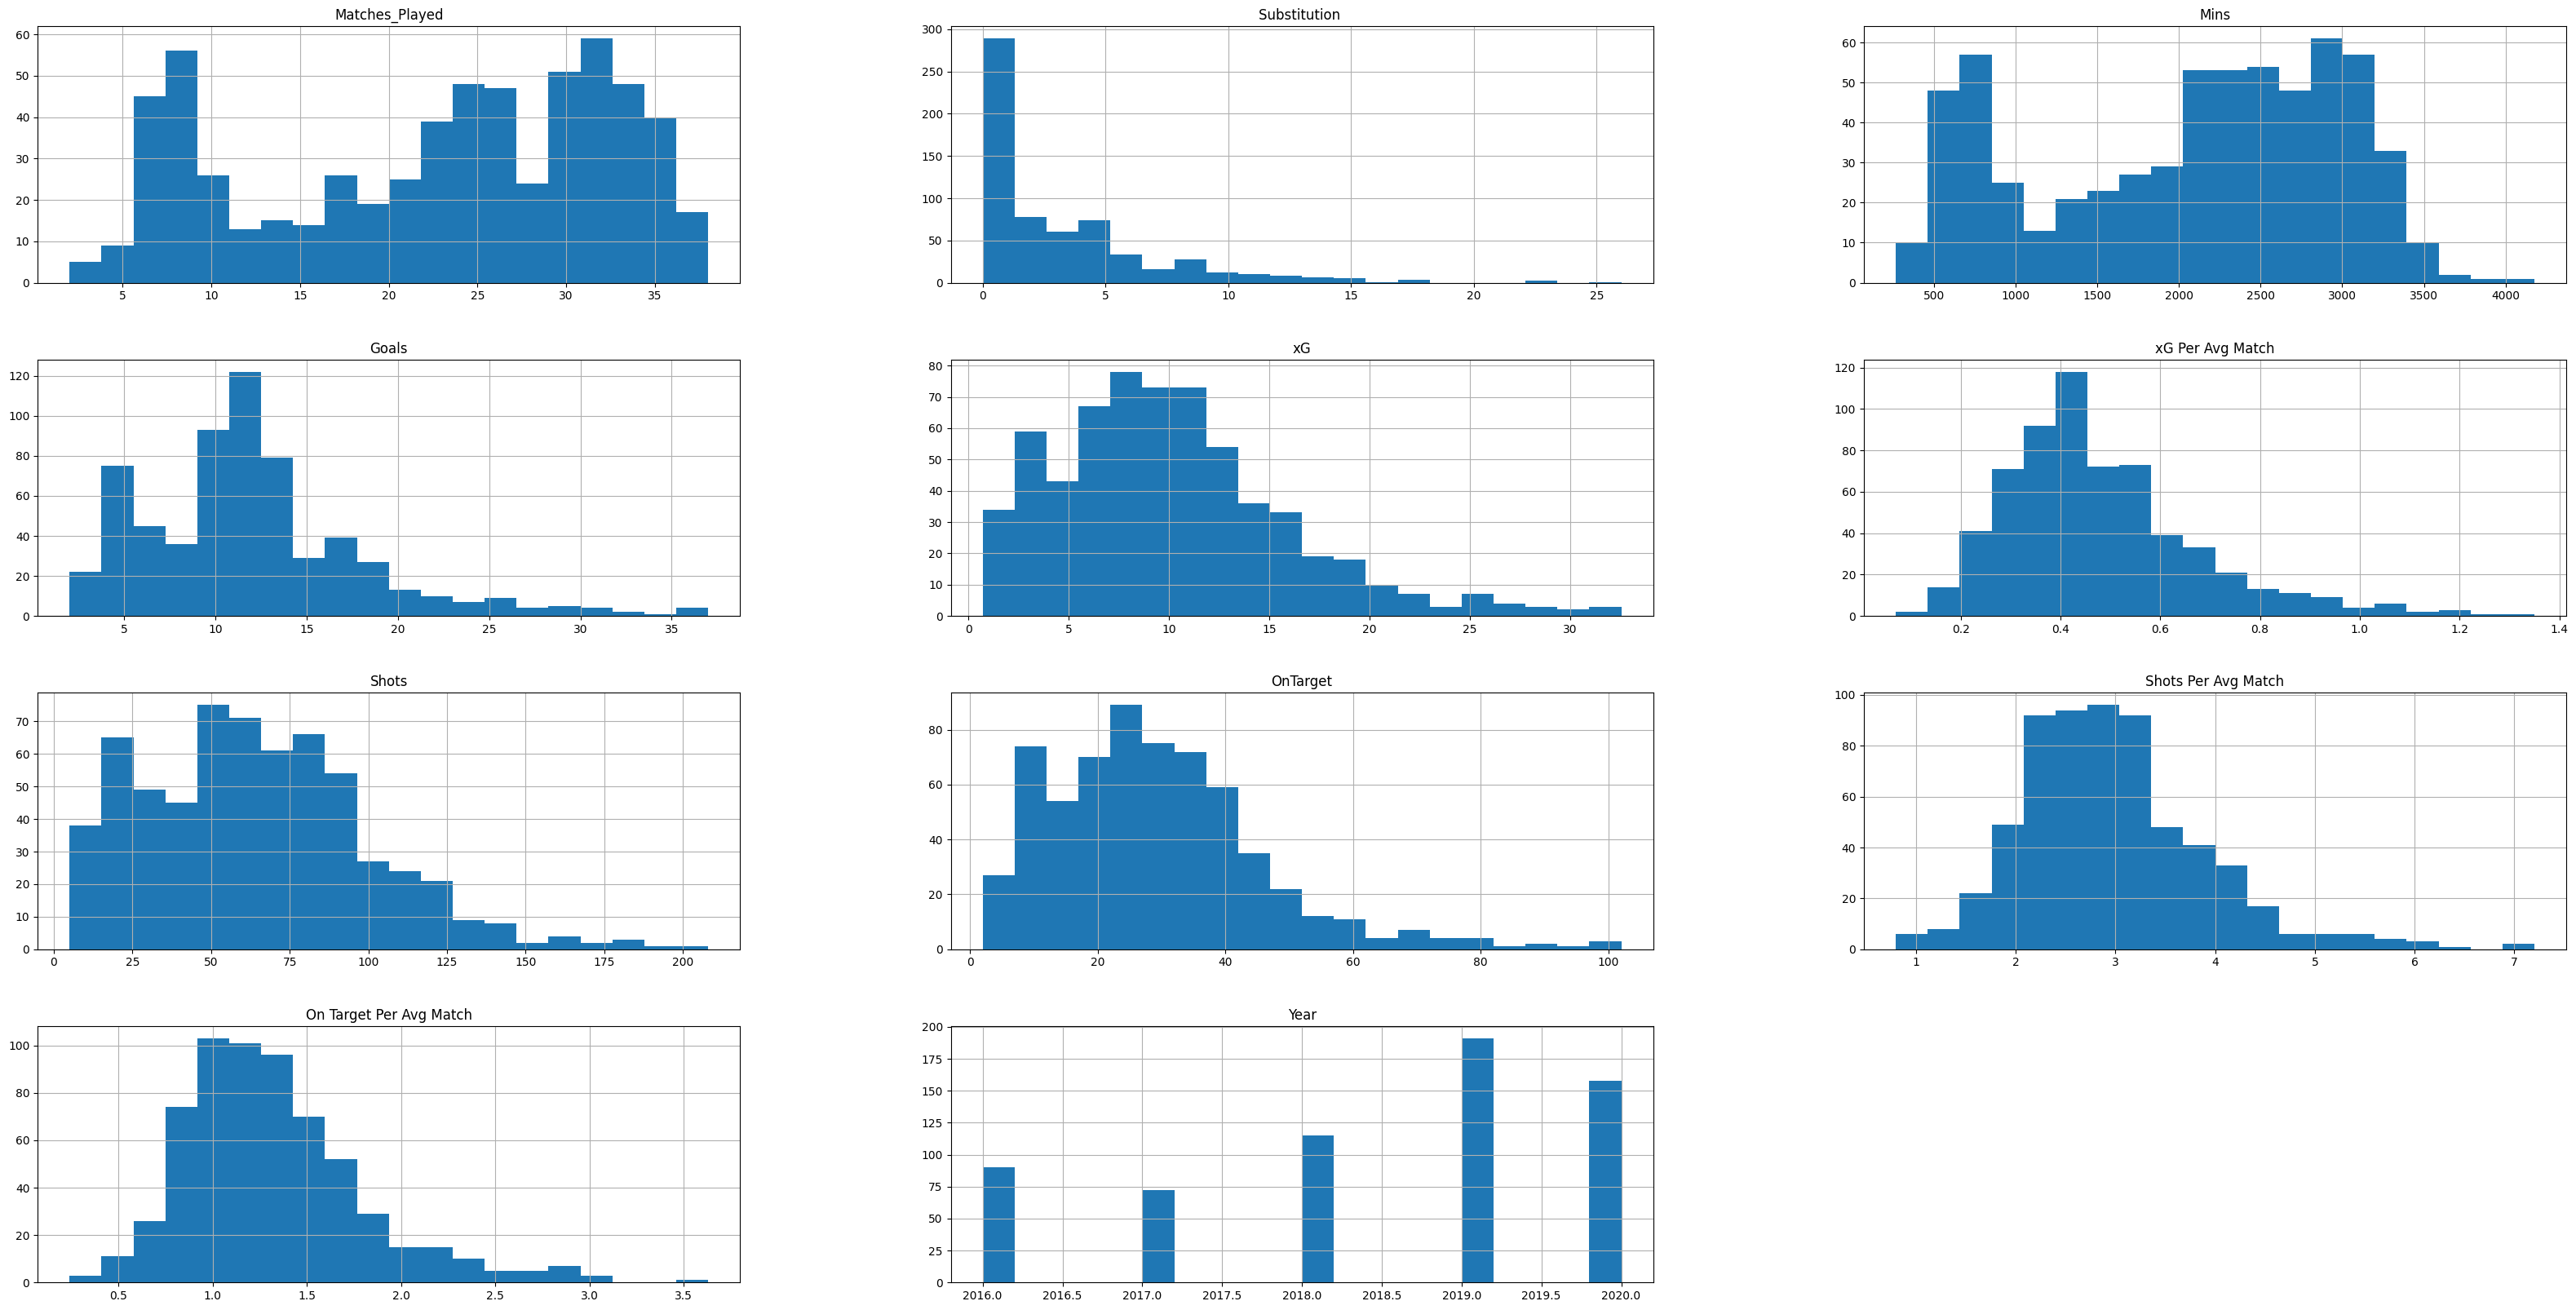

In [13]:
df.hist(bins=20,figsize=(40,20))
plt.show()

In [14]:
df

,Country,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Netherlands,RZA,Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020
655,Netherlands,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020


In [15]:
# Every country has a Matches_Played
fig = px.histogram(df, x="Country", y="Matches_Played")
fig.show()

In [16]:
### sum of match played in the year 
fig = px.histogram(df, x="Country", y="Matches_Played", color="Year")
fig.show()

In [17]:
##sum of goals in the year by the country
fig = px.histogram(df, x="Country", y="Goals", color="Year")
fig.show()

In [18]:
### Compare Between Lionel Messi and Cristiano Ronaldo Goals
players = df[['Player Names','Goals','Year']][(df['Player Names']=='Cristiano Ronaldo') | (df['Player Names']=='Lionel Messi')]

In [19]:

fig = px.histogram(players, x="Player Names", y="Goals", color="Year")
fig.show()

In [20]:
##the top '6' player
top_player = df[["Player Names", "Goals", "Year"]].sort_values(by="Goals", ascending=False).iloc[:6]
top_player

,Player Names,Goals,Year
12,Lionel Messi,37,2016
391,Ciro Immobile,36,2019
317,Carlos Vela,36,2019
195,Lionel Messi,36,2018
408,Robert Lewandowski,34,2019
251,Kylian Mbappe-Lottin,33,2018


In [21]:
fig = px.histogram(top_player, x="Player Names", y="Goals", color="Year")
fig.show()

In [22]:
###top 5 player time 
top_player_mins =df[["Player Names", "Mins", "Year"]].sort_values(by="Mins", ascending=False).iloc[:5]
top_player_mins

,Player Names,Mins,Year
291,Diego Souza,4177,2018
293,Nico Lupez,3931,2018
260,Luka Milivojevic,3651,2018
212,Francesco Caputo,3641,2018
114,Gerard Moreno,3555,2017


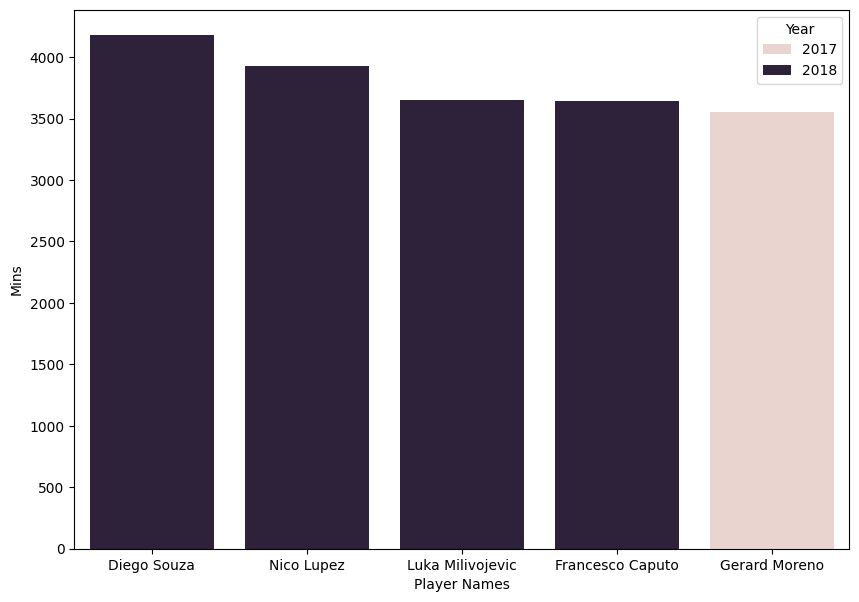

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Player Names", y="Mins", hue="Year", data=top_player_mins)
plt.show()

In [24]:
df.head()

,Country,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [25]:
###Number of minutes played by Barcelona players per season
BAR = df[["Player Names", "Mins", "Year"]][df["Club"] == "BAR"]
BAR

,Player Names,Mins,Year
1,Antoine Griezmann,3129,2016
12,Lionel Messi,2910,2016
69,Philippe Coutinho,2327,2016
101,Antoine Griezmann,2596,2017
107,Lionel Messi,3123,2017
125,Mirco Antenucci,2735,2017
193,Antoine Griezmann,3349,2018
195,Lionel Messi,2849,2018
333,Lionel Messi,3067,2019
374,Trincao,1749,2019


In [26]:
fig = px.histogram(BAR, x="Player Names", y="Mins", color="Year")
fig.show()

In [27]:
### player in englang score goals
England = df[["Player Names", "Goals", "Year"]][df["Country"] == "England"].sort_values(by="Goals", ascending=False)
England

,Player Names,Goals,Year
62,Harry Kane,29,2016
61,Romelu Lukaku,25,2016
60,Alexis Sanchez,24,2016
443,Jamie Vardy,23,2019
263,Mohamed Salah,22,2018
...,...,...,...
603,Timo Werner,4,2020
615,Neal Maupay,4,2020
617,Sadio Mane,4,2020
618,Riyad Mahrez,4,2020


In [28]:
fig = px.histogram(England, x="Player Names", y="Goals", color="Year")
fig.update_xaxes(tickangle=45)
fig.show()

### `Split the dataset`

In [29]:
###split
x = df.drop(columns=["xG"], axis=1)
y = df["xG"]

###split to train and test
x_train , x_test , y_train , y_test =train_test_split( x , y , test_size=0.2,shuffle=True , random_state=45)

print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("######"*10)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)

x_train.shape (500, 13)
y_train.shape (500,)
############################################################
x_test.shape (126, 13)
y_test.shape (126,)


In [30]:
###Numerical : 'Matches_Played', 'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'Year'& imputing (median) & scaling (standrad)
##categorical :''Country', 'Club', 'Player Names'&imputing (mode) & encoding (labelencoding)

num_col=x_train.select_dtypes(include='number').columns.tolist()
categ_col=x_train.select_dtypes(exclude='number').columns.tolist()

print('the numerical colum \t',num_col)
print("the cateogrical colum \t ",categ_col)

the numerical colum 	 ['Matches_Played', 'Substitution ', 'Mins', 'Goals', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year']
the cateogrical colum 	  ['Country', 'Club', 'Player Names']


In [31]:
##pipline
num_pipe=Pipeline(steps=[
                    ('selector',DataFrameSelector(num_col)),
                    ('imputer',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
categ_pipe = Pipeline(
    steps=[
        ("selector", DataFrameSelector(categ_col)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ]
)
all_pipe=FeatureUnion(transformer_list=[
                   ('categorical',categ_pipe),
                   ('numerical',num_pipe)
])


x_train_final =all_pipe.fit_transform(x_train)
x_test_finall = all_pipe.transform(x_test)

## `Bulding Model`

In [32]:
models={
    'lR':LinearRegression(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'xgboost':XGBRegressor(),
    'RF':RandomForestRegressor(),
}

In [33]:
for name ,model in models.items():
    print(f'using model :{name}')
    model.fit(x_train_final,y_train)
    print(f"taraining score:{model.score(x_train_final,y_train)}")
    print(f"test score : {model.score (x_test_finall,y_test)}")
    y_pred=model.predict(x_test_finall)
    print(f"mse:{(mean_squared_error(y_test,y_pred))}")
    print('------------------------------------------')

using model :lR
taraining score:0.9866388394242178
test score : 0.9417828102158922
mse:1.8839585157269938
------------------------------------------
using model :SVR
taraining score:0.9182093094424922
test score : 0.8335836053208434
mse:5.385378185979822
------------------------------------------
using model :DT
taraining score:1.0
test score : 0.9247889762965874
mse:2.4338936507936513
------------------------------------------
using model :xgboost
taraining score:0.9998849161974577
test score : 0.9729062154632141
mse:0.8767782555399839
------------------------------------------
using model :RF
taraining score:0.9952097026858734
test score : 0.9734774860729447
mse:0.858291445476192
------------------------------------------


In [34]:
###xgboost
model = XGBRegressor()
model.fit(x_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred=model.predict(x_test_finall)
y_pred

array([ 7.3368797, 13.013137 , 13.033643 ,  9.969577 , 29.617817 ,
        3.413182 , 12.032997 , 11.608756 ,  3.0512328,  2.9715004,
       15.095732 ,  8.520035 , 17.739616 , 13.195991 , 15.896244 ,
       15.734724 , 12.312664 ,  5.8019395, 12.382773 , 29.76738  ,
       15.8841   ,  1.6413921, 11.964904 ,  5.186723 ,  9.201089 ,
        8.147299 , 16.015232 ,  6.2765903,  3.272678 ,  4.2606583,
       13.923459 ,  9.539561 ,  8.733623 ,  5.627345 , 16.043371 ,
        1.4526823,  8.923049 ,  1.9393746,  9.198751 ,  7.6336875,
        5.5086465, 15.933362 , 16.165636 ,  8.173313 ,  8.390398 ,
       12.763381 ,  4.9670453, 13.144786 , 10.265014 , 11.066854 ,
       11.370941 ,  7.8143296, 18.461136 , 11.317856 ,  2.476872 ,
       14.751697 , 13.561084 ,  5.354864 ,  6.8997436,  8.111977 ,
        2.7809854,  5.8857446, 12.382839 , 14.324588 ,  3.449602 ,
       16.378359 ,  5.953883 ,  7.062426 ,  9.396746 ,  8.295521 ,
       14.910171 ,  7.651106 , 11.100015 , 19.734371 ,  4.8969

In [36]:
y_test

287     8.10
144    12.89
249    14.51
122     9.39
112    29.00
       ...  
366    10.46
23     15.05
273    21.71
575     6.76
656     9.77
Name: xG, Length: 126, dtype: float64

In [37]:
import joblib

In [38]:
joblib.dump(model,'model_xgboost')

['model_xgboost']